In [3]:
import os
import sys
import itertools

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

if '..' not in sys.path: sys.path.insert(0, '..')
from common import colors

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
    [0, 9],
    [1, 6],
    [2, 5],
    [3, 20],
    [4, 10],
    [5, 20],
    [6, 30],
    [7, 42],
    [8, 24],
    [9, 32],
    [10, 45],

])

[[ 3.68181818]
 [ 3.68181818]]


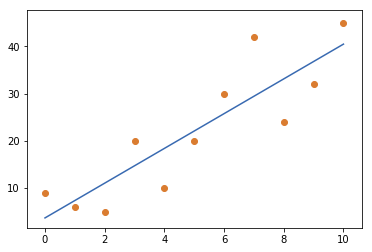

In [5]:
m = len(data)
X = np.array([np.ones(m), data[:, 0]]).T
y = np.array(data[:, 1]).reshape(-1, 1)
betaHat = np.linalg.solve(X.T.dot(X), X.T.dot(y))
print(betaHat)
plt.figure(1)
xx = np.linspace(0, 10, 5)
yy = np.array(betaHat[0] + betaHat[1] * xx)
plt.plot(xx, yy.T, color=colors.line_indexed[0])
plt.scatter(data[:, 0], data[:, 1], color=colors.line_indexed[1])
plt.show()


In [95]:
class ParametricCurve(object):
    def __call__(self, u):
        raise NotImplementedError("Subclasses must implement this")
        
# B-Spline Basis function
def N(i, k, x, knots):
    T = knots
    if k == 0:
        if T[i] <= x < T[i+1]:
            return 1.0
        else:
            return 0.0
    else:
        part1 = 0.0
        if (T[i+k] - T[i] != 0.0):
            part1 = ((x-T[i])/(T[i+k] - T[i])) * N(i, k-1, x, T)
        part2 = 0.0
        if (T[i+k+1] - T[i+1] != 0.0):
            part2 = ((T[i+k+1] - x)/(T[i+k+1] - T[i+1])) * N(i+1, k-1, x, T)
        return part1 + part2
      
class BSplineCurve(ParametricCurve):
    def __init__(self, order, knots, points):
        self.order = order
        self.p = self.order - 1
        self.knots = knots
        m = len(self.knots) - 1
        self.points = points
        n = len(self.points) - 1
        assert len(self.points) > self.order
        print (m, n)
        print (self.p, m - n - 1)
        assert self.p == m - n - 1
        self.knot_range = (self.knots[-1] - self.knots[0])

        
    def __call__(self, u):
        assert u >= 0.0 and u <= 1.0
        t = (u * self.knot_range) + self.knots[0]
        final = 0.0
        for i, Pi in enumerate(self.points):
            basis = N(i, self.p, t, self.knots)
            final += basis * Pi
        return final
    
        

[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9]
[[ 0  9]
 [ 1  6]
 [ 2  5]
 [ 3 20]
 [ 4 10]
 [ 5 20]
 [ 6 30]
 [ 7 42]
 [ 8 24]
 [ 9 32]
 [10 45]]
13 10
2 2


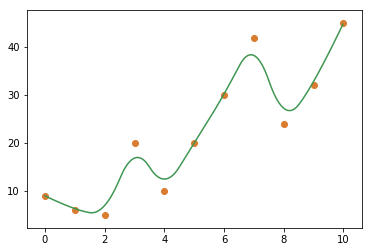

In [100]:
xx = np.linspace(0.0, 1.0, 100)
order = 3
knots = list(range(len(data[:, 0])-order+2))
beginning = [0] * (order-1)
ending = [knots[-1]] * (order-1)
knots = beginning + knots + ending
print(knots)
print(data)
curve = BSplineCurve(order, knots, data)
points = []
for u in range(0, 1000, 1):
    points.append(curve(u/1000.0))

plt.plot([p[0] for p in points], [p[1] for p in points], color=colors.line_indexed[2])
plt.scatter(data[:, 0], data[:, 1], color=colors.line_indexed[1])
#plt.scatter([p[0] for p in points], [p[1] for p in points], color=colors.line_indexed[3])
plt.show()
